# Plant Disease Detection Using Leaf Images
**ML** using color histograms and Logistic Regression
---

#### Dataset: PlantVillage Dataset
#### Description

The PlantVillage dataset is a comprehensive collection of images of various plant species namely Apple, Cherry, Grapes, Orange, Potato, Strawberry, Tomato etc. Each of the species has healthy and diseased plant leaves. It is widely used for research and development in the field of plant disease detection and classification using machine learning and deep learning techniques.

**Overview**

The dataset consists of 54,303 images of plant leaves, categorized into 38 classes based on species and disease. These images are divided into healthy and unhealthy categories, providing a diverse set of data for training and testing machine learning models.

**Structure**

The dataset is structured with the following features:
    
    Image Folder: The folder containing all the images of one species with a certain disease (represents one class).
    Image: The actual image of the plant leaf.
    Label: The class label indicating the species and disease of the plant leaf.

The images are in RGB format with a shape of (256,256, 3) and are stored as uint8 data type.

For the ease of processing and execution and understanding, we shall focus on only 1 species classify and the corresponding diseases.
The plant species that we'll consider would be Tomato to classify into it's disease class.

#### Problem statement:

Fruit and vegetable plants are prone to various diseases that can drastically reduce crop yield and quality. Manual identification of these diseases requires expert knowledge, is time-consuming, and is not scalable for large agricultural settings. With the increasing availability of labeled image datasets like PlantVillage, there is an opportunity to automate this process using deep learning techniques.

The goal of the project is to **build a model** that can **identify the leaves** from different species and **classify them according to their diseases** (or healthy).

#### Installations

In [9]:
# !pip install opencv-python
# !pip install scikit-learn

In [10]:
# import sys # load the location of python running in the notebook
# print(sys.executable)

In [11]:
# !{sys.executable} -m pip install opencv-python # make sure to install the libs for the same python env

#### Importing

In [11]:
# Importing required libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import time

#### Loading the dataset

In [3]:
# Load Dataset & Analyze
data_dir = "Dataset"  

# List all classes (disease categories)
classes = os.listdir(data_dir)
print(f"Number of classes: {len(classes)}")
print("Classes:", classes[:4])

# Count images in each class (display first few)
for cls in classes[:5]:
    print(f"{cls}: {len(os.listdir(os.path.join(data_dir, cls)))} images")


Number of classes: 17
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
Apple___Apple_scab: 630 images
Apple___Black_rot: 621 images
Apple___Cedar_apple_rust: 275 images
Apple___healthy: 1645 images
Potato___Early_blight: 1000 images


#### Load and Preprocess Images (Encode Labels)

In [4]:
X = []
y = []

s = time.time()
j = 0
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    j+=1
    i=0
    for img_name in os.listdir(cls_path)[:500]:  # Limit for faster processing
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            X.append(img)
            y.append(cls)
            i+=1
    print(f'Loaded {i} images of class {j} - {cls} in  {np.round((time.time() - s)/60, 2)} minutes')

Loaded 500 images of class 1 - Apple___Apple_scab in  0.06 minutes
Loaded 500 images of class 2 - Apple___Black_rot in  0.15 minutes
Loaded 275 images of class 3 - Apple___Cedar_apple_rust in  0.2 minutes
Loaded 500 images of class 4 - Apple___healthy in  0.28 minutes
Loaded 500 images of class 5 - Potato___Early_blight in  0.35 minutes
Loaded 152 images of class 6 - Potato___healthy in  0.37 minutes
Loaded 500 images of class 7 - Potato___Late_blight in  0.47 minutes
Loaded 500 images of class 8 - Tomato___Bacterial_spot in  0.54 minutes
Loaded 500 images of class 9 - Tomato___Early_blight in  0.61 minutes
Loaded 500 images of class 10 - Tomato___healthy in  0.71 minutes
Loaded 500 images of class 11 - Tomato___Late_blight in  0.78 minutes
Loaded 500 images of class 12 - Tomato___Leaf_Mold in  0.9 minutes
Loaded 500 images of class 13 - Tomato___Septoria_leaf_spot in  0.99 minutes
Loaded 500 images of class 14 - Tomato___Spider_mites Two-spotted_spider_mite in  1.1 minutes
Loaded 500 

In [5]:
# Prepare a numpy array
# type(X), type(X[0]), type(X[0].shape)

In [6]:
X = np.array(X)
y = np.array(y)
print("Image data shape:", X.shape)

Image data shape: (7800, 256, 256, 3)


In [7]:
# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print("Encoded classes:", encoder.classes_)

Encoded classes: ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


In [25]:
# save the encoded labels
joblib.dump(encoder, "label_encoder.pkl")

['label_encoder.pkl']

## **ML (Color Histograms)**

#### Extracting Features (Feature Engineering)

In [8]:
# Extract Color Histogram Features
features = []
for img in X:
    hsv_img = cv2.cvtColor((img).astype('uint8'), cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_img], [0,1,2], None, [8,8,8], [0,256,0,256,0,256])
    hist = cv2.normalize(hist, hist).flatten()
    features.append(hist)

features = np.array(features)
print("Feature shape:", features.shape)

Feature shape: (7800, 512)


#### Split for Train and Test sets

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42, stratify = y)

In [12]:
#  save as pkl files for deployment
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']

In [13]:
print('X train: ', X_train.shape, X_train[0].shape)
print('Y train: ', y_train.shape, end = '\n'*2)
print('X test: ', X_test.shape, X_test[0].shape)
print('Y test: ', y_test.shape)

X train:  (6240, 512) (512,)
Y train:  (6240,)

X test:  (1560, 512) (512,)
Y test:  (1560,)


#### Train the Model

In [14]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [22]:
# save the model for deployment
joblib.dump(model, "model.pkl")

['model.pkl']

In [15]:
# # Train Logistic Regression Model
# from sklearn.linear_model import LogisticRegression

# model_lr = LogisticRegression(max_iter=500)
# model_lr.fit(X_train_ml, y_train_ml)

#### Prediction Results and Model Evaluation

In [21]:
# Predict 
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", np.round(accuracy_score(y_test, y_pred)*100, 2))
print(classification_report(y_test, y_pred))

Accuracy: 74.04
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       100
           1       0.67      0.80      0.73       100
           2       0.75      0.80      0.77        55
           3       0.77      0.77      0.77       100
           4       0.85      0.89      0.87       100
           5       0.65      0.74      0.69       100
           6       0.64      0.60      0.62        30
           7       0.84      0.77      0.80       100
           8       0.70      0.57      0.63       100
           9       0.74      0.61      0.67       100
          10       0.76      0.77      0.77       100
          11       0.55      0.51      0.53       100
          12       0.62      0.75      0.68       100
          13       0.74      0.75      0.75       100
          14       0.75      0.73      0.74       100
          15       0.82      0.93      0.88        75
          16       0.90      0.89      0.89       100

    accura

In [17]:
# single prediction
# test_img = np.array(np.arange(512))  # random array
test_img = X_test[46]
model.predict(test_img.reshape(1,-1))

array([7])

#### Confusion Matrix

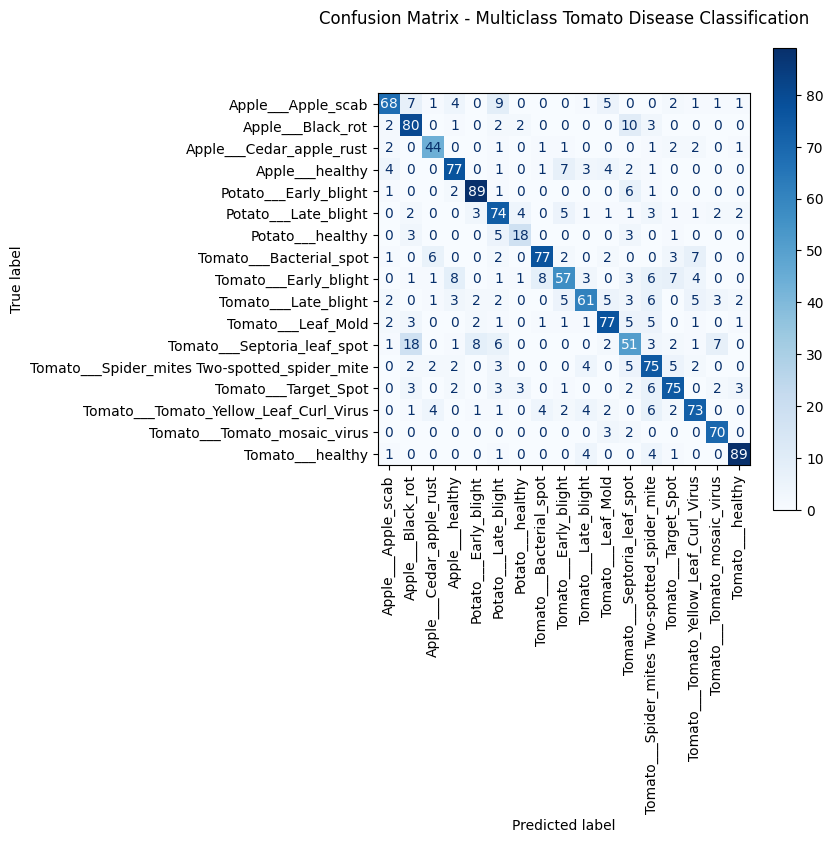

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

# Inverse transform to get class labels (if needed)
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix - Multiclass Tomato Disease Classification", pad = 50)
plt.show()


#### Final Dataframe

In [19]:
final_df = pd.DataFrame(data = {'Image': y_test, 'Actual': encoder.inverse_transform(y_test), 'Predicted':encoder.inverse_transform(y_pred)})
final_df

Image                                         Actual  \
0         8                          Tomato___Early_blight   
1         4                          Potato___Early_blight   
2        14         Tomato___Tomato_Yellow_Leaf_Curl_Virus   
3        10                             Tomato___Leaf_Mold   
4        13                           Tomato___Target_Spot   
...     ...                                            ...   
1555      3                                Apple___healthy   
1556      4                          Potato___Early_blight   
1557     11                    Tomato___Septoria_leaf_spot   
1558      3                                Apple___healthy   
1559     12  Tomato___Spider_mites Two-spotted_spider_mite   

                                          Predicted  
0                              Tomato___Target_Spot  
1                             Potato___Early_blight  
2                              Tomato___Late_blight  
3                                Tomato___Leaf_Mold  
4                              Tomato___Target_Spot  
...                                             ...  
1555                          Tomato___Early_blight  
1556                          Potato___Early_blight  
1557                    Tomato___Septoria_leaf_spot  
1558                          Tomato___Early_blight  
1559  Tomato___Spider_mites Two-spotted_spider_mite  

[1560 rows x 3 columns]

#### 

In [ ]:
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import RocCurveDisplay
# import numpy as np

# # Example: Assume y_test and y_score already exist
# # y_score should be the predicted probabilities: model.predict_proba(X_test)

# # One-hot encode the labels
# y_test_bin = label_binarize(y_test, classes=range(len(encoder.classes_)))
# n_classes = y_test_bin.shape[1]

# # Get predicted probabilities
# y_score = model.predict_proba(X_test)  # Make sure model supports predict_proba

# # Compute ROC curve and ROC area for each class
# fpr = {}
# tpr = {}
# roc_auc = {}

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
#     print(f'Area under the curve for class {i} : {np.round(roc_auc[i], 2)}')

In [ ]:
# # Plot all ROC curves
# plt.figure(figsize=(12, 8))
# colors = plt.cm.get_cmap('tab20', n_classes)

# for i in range(n_classes):
#     plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})", color=colors(i))

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([-0.01, 1.01])
# plt.ylim([-0.01, 1.01])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Multiclass ROC Curve", pad=20)
# plt.legend(loc="lower right", fontsize='small', ncol=2)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

### Visualizing RGB Histogram (1D per channel)

In [ ]:
for cls in tomato_classes[:1]:
    cls_path = os.path.join(data_dir, cls)
    print(cls_path)
    for img_name in os.listdir(cls_path)[:1]:
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        
        # Plot histogram for each channel
        colors = ('r', 'g', 'b')
        plt.figure(figsize=(7,4))
        
        for i, color in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        
        plt.title('RGB Color Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()